In [1]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Main folder path
data_dir = '/content/drive/MyDrive/project-5/images'
categories = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
              'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']

# Iterate over categories
for category in categories:
    Path = os.path.join(data_dir, category)  # Path to each category folder
    x = 0
    for img in os.listdir(Path):  # Iterate over each image in the category
        x += 1
        img_path = os.path.join(Path, img)
        img_array = cv2.imread(img_path)  # Load image in BGR format
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img_array)  # Display in color
        plt.axis('off')  # Turn off axes for better visualization
        plt.show()
        if x == 1:  # Display only the first image per category
            break

Output hidden; open in https://colab.research.google.com to view.

In [3]:
print(img_array)

[[[127 102  71]
  [135 109  76]
  [146 116  80]
  ...
  [213 183 185]
  [211 179 180]
  [201 169 170]]

 [[115  90  59]
  [128 102  69]
  [147 117  81]
  ...
  [215 184 189]
  [211 181 183]
  [201 171 173]]

 [[111  84  54]
  [128  99  67]
  [149 119  83]
  ...
  [219 190 195]
  [214 185 190]
  [204 175 180]]

 ...

 [[ 52   4   4]
  [ 52   4   4]
  [ 50   4   4]
  ...
  [214 235 254]
  [213 234 253]
  [213 234 253]]

 [[ 54   4   5]
  [ 53   5   5]
  [ 50   4   4]
  ...
  [214 235 254]
  [213 234 253]
  [213 234 253]]

 [[ 54   4   5]
  [ 53   5   5]
  [ 53   5   5]
  ...
  [214 235 254]
  [213 234 253]
  [212 233 252]]]


In [4]:
print(f'shape : {img_array.shape}')

shape : (512, 512, 3)


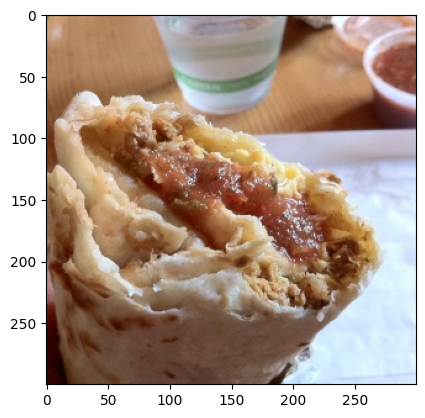

In [5]:
img_size = 300

new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data=[]

def create_training_data():
    for category in categories:

        Path = os.path.join(data_dir, category)
        class_num = categories.index(category)

        for img in tqdm(os.listdir(Path)):

            img_array= cv2.imread(os.path.join(Path,img))
            new_array= cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])


create_training_data()

100%|██████████| 434/434 [00:06<00:00, 68.62it/s]


In [7]:
print(training_data[:1])

[[array([[[ 18,  52,  66],
        [ 21,  54,  69],
        [ 20,  53,  67],
        ...,
        [ 72,  93,  80],
        [ 65,  88,  75],
        [ 58,  83,  69]],

       [[ 27,  56,  70],
        [ 24,  52,  66],
        [ 24,  51,  64],
        ...,
        [103, 120, 111],
        [ 90, 109, 100],
        [ 78,  98,  89]],

       [[ 29,  52,  65],
        [ 28,  50,  62],
        [ 34,  54,  66],
        ...,
        [138, 150, 146],
        [127, 141, 138],
        [113, 128, 124]],

       ...,

       [[ 13,  59,  93],
        [ 19,  65,  99],
        [ 23,  70, 104],
        ...,
        [ 43,  69,  83],
        [ 47,  74,  88],
        [ 38,  64,  78]],

       [[ 11,  45,  77],
        [ 22,  58,  90],
        [ 25,  63,  95],
        ...,
        [ 45,  71,  86],
        [ 39,  66,  80],
        [ 39,  66,  80]],

       [[ 11,  38,  68],
        [ 19,  47,  77],
        [ 20,  49,  79],
        ...,
        [ 38,  64,  78],
        [ 37,  64,  77],
        [ 22,  49,  63

In [8]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

8
9
1
0
7
3
3
3
9
4


In [9]:
img_size = 300

x = []
y = []

for label, folder in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        x.append(img)
        y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
y = np.array(y)


print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (14667, 300, 300, 1)
y shape: (4889,)


In [10]:
from sklearn.model_selection import train_test_split

min_length = min(len(x), len(y))
x = x[:min_length]
y = y[:min_length]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=1234)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3422, 300, 300, 1)
(1467, 300, 300, 1)
(3422,)
(1467,)


In [19]:
Keras_Model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='VALID',
                        input_shape=(img_size, img_size, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding='VALID'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Keras_Model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
Keras_Model.fit(x_train, y_train, epochs=8, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1)])

Epoch 1/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 593s 6s/step - accuracy: 0.1094 - loss: 32.6503
Epoch 2/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 595s 6s/step - accuracy: 0.1009 - loss: 2.5286
Epoch 3/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 611s 5s/step - accuracy: 0.1211 - loss: 2.3334
Epoch 4/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 583s 5s/step - accuracy: 0.1235 - loss: 2.3487
Epoch 5/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 622s 5s/step - accuracy: 0.1179 - loss: 2.3263
Epoch 6/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 623s 5s/step - accuracy: 0.1221 - loss: 2.4474
Epoch 7/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 583s 5s/step - accuracy: 0.1157 - loss: 2.2849
Epoch 8/8
107/107 ━━━━━━━━━━━━━━━━━━━━ 618s 5s/step - accuracy: 0.1189 - loss: 2.2905


In [20]:
Keras_Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 298, 298, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 149, 149, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 146, 146, 32)        │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 170528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      21,827,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,845,994 (83.34 MB)

 Trainable params: 21,845,866 (83.34 MB)

 Non-trainable params: 128 (512.00 B)